In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_size = (32,32)
path="spectrograms"

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(path,color_mode="grayscale",image_size=[32,32],labels='inferred',label_mode = "int" ,batch_size=None,shuffle=False)
#"spectrograms" dosyasının içindeki alt dosyaları sınıf olarak, ve görüntüleri data olarak çekiyoruz.
#image_dataset_from_directory fonksiyonu sayesinde resizing,grayscaling yaptık
#! "shuffle=True" iken accuracy score çok düşük !

Found 8735 files belonging to 10 classes.


In [4]:
def normalization(image,label): #datasetimiz (image,label) şeklinde bir tf.DataSet formunda image arrayi üzerinde normalization yapmak için fonksiyon oluşturuyoruz
    image = tf.cast(image/255. , tf.float32)
    return image,label

In [5]:
normalized_train_ds = train_ds.map(normalization) #normalization fonksiyonunu train_ds üzerine uyguluyoruz

In [6]:
images = list(normalized_train_ds.map(lambda x, y: x)) #datasetin içerisinden görüntüleri çekiyoruz (features for ML)
labels = list(normalized_train_ds.map(lambda x, y: y)) #datasetin içerisinden labelleri çekiyoruz (targets for ML)
images= np.asarray(images) 
labels= np.asarray(labels)

In [7]:
datas = list() #images.shape = (x,32,32,1) şeklinde çıkmakta her görüntünün 3d array olduğunu görmekteyiz bunu 2d arraya dönüştürüyoruz.
for image in images:
    image = np.reshape(image,(32,32))
    datas.append(image)
datas=np.array(datas)

In [8]:
X_train,X_val_test,y_train,y_val_test = train_test_split(datas,labels,test_size = 0.2) #datasetin %80'i training için ayırıyoruz.
X_test,X_val,y_test,y_val = train_test_split(X_val_test,y_val_test,test_size=0.5) #datasetin %10'unu testing %10'unu validation için ayırıyoruz.

In [9]:
print(X_train.shape,X_test.shape,X_val.shape)

(6988, 32, 32) (873, 32, 32) (874, 32, 32)


In [10]:
model = keras.Sequential() #modeli kuruyoruz

In [11]:
model.add(layers.Conv2D(32,
                kernel_size=(3,3),
                strides=(1,1),
                padding="same",
                activation="relu",
                input_shape=[32,32,1]))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,
                kernel_size=(3,3),
                strides=(1,1),
                padding="same",
                activation="relu"))

model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64,
                kernel_size=(3,3),
                strides=(1,1),
                padding="same",
                activation="relu"))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10,activation="softmax"))

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [12]:
results = model.fit(X_train,y_train,batch_size=128,epochs = 20,validation_data=(X_val,y_val)) #training

Epoch 1/20
55/55 [==============================] - 7s 108ms/step - loss: 2.1306 - accuracy: 0.2108 - val_loss: 1.8124 - val_accuracy: 0.4371
Epoch 2/20
55/55 [==============================] - 5s 100ms/step - loss: 1.8057 - accuracy: 0.3404 - val_loss: 1.4336 - val_accuracy: 0.5217
Epoch 3/20
55/55 [==============================] - 5s 89ms/step - loss: 1.5993 - accuracy: 0.4199 - val_loss: 1.3051 - val_accuracy: 0.5973
Epoch 4/20
55/55 [==============================] - 6s 101ms/step - loss: 1.4706 - accuracy: 0.4784 - val_loss: 1.2815 - val_accuracy: 0.5481
Epoch 5/20
55/55 [==============================] - 5s 97ms/step - loss: 1.3752 - accuracy: 0.5140 - val_loss: 1.1221 - val_accuracy: 0.6510
Epoch 6/20
55/55 [==============================] - 5s 97ms/step - loss: 1.2815 - accuracy: 0.5467 - val_loss: 1.0520 - val_accuracy: 0.6613
Epoch 7/20
55/55 [==============================] - 7s 121ms/step - loss: 1.1995 - accuracy: 0.5766 - val_loss: 0.9797 - val_accuracy: 0.7037
Epoch 8/2

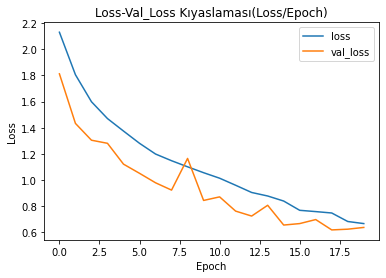

In [13]:
plt.plot(results.history["loss"],label="loss")

plt.plot(results.history["val_loss"],label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss-Val_Loss Kıyaslaması(Loss/Epoch)")
plt.legend()

plt.show()

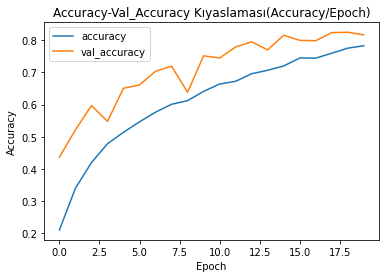

In [14]:
plt.plot(results.history["accuracy"],label="accuracy")

plt.plot(results.history["val_accuracy"],label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy-Val_Accuracy Kıyaslaması(Accuracy/Epoch)")
plt.legend()

plt.show()